### Neural Network From Scratch

In this project, we'll build a neural network from the ground up to perform multi-class classification on a synthetic dataset. We'll implement the neural network architecture, including forward propagation, backpropagation, and weight updates.

The goal is to understand the fundamental components of a neural network and how it learns to make predictions.

#### Import Necessary Libraries
We are importing the required libraries, numpy for numerical operations, matplotlib.pyplot for visualization, sklearn.datasets for generating synthetic data, and train_test_split for splitting data into training and testing sets.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Now, we generate a synthetic dataset using make_classification from sklearn.datasets. We're generating 500 samples with 2 features, where 2 features are informative. We're then plotting the dataset using plt.scatter to visualize the two classes.

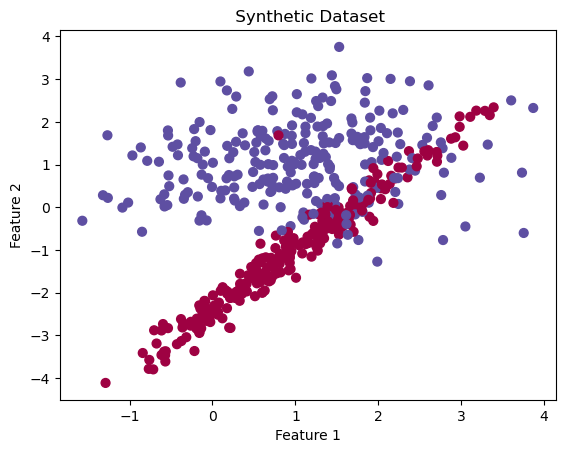

In [2]:
# Generating dataset
np.random.seed(0)
X, y = sklearn.datasets.make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                                           n_clusters_per_class=1)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.title(" Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We split the dataset into training and testing sets using train_test_split. This line assigns the training and testing data for features (X_train and X_test) and labels (y_train and y_test).



In [3]:
# Split the dataset into test and train set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In this step we're defining the `NeuralNetwork` class. It has an initialization method (__init__) where you set up the architecture of your neural network, including the input size, hidden size, output size, and learning rate.

Then we define the activation functions (sigmoid and softmax) inside the `NeuralNetwork` class. These functions perform element-wise computations on arrays.

The forward method calculates the forward propagation steps of the neural network. It computes weighted sums and activations at each layer using the learned weights and biases. X is the input data. The backward method implements the backpropagation algorithm to compute gradients and update weights and biases. This step is essential for training the neural network. X is the input data, and y are the true labels.

In [4]:
# Define the Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """
        Initialize a neural network with specified architecture and hyperparameters.

        :param input_size: Number of input features.
        :param hidden_size: Number of neurons in the hidden layer.
        :param output_size: Number of output classes.
        :param learning_rate: Learning rate for gradient descent (default is 0.01).
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases with Xavier/Glorot initialization for the neural network layers
        self.W1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))
    
    # Define Activation Functions:
    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))
    
    def softmax(self, z):
        """Softmax activation function for multi-class classification."""
        exp_scores = np.exp(z)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Define Forward Propagation:
    def forward(self, X):
        """
        Perform forward propagation to compute the output probabilities.

        :param X: Input data.
        """
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.probs = self.softmax(self.z2)
    
    # Define Backpropagation:
    def backward(self, X, y):
        """
        Perform backpropagation to compute gradients and update weights and biases.

        :param X: Input data.
        :param y: True labels.
        """
        # Step 1: Compute the error in the output layer (delta3)
        num_samples = X.shape[0]
        delta3 = self.probs
        delta3[range(num_samples), y] -= 1

        # Step 2: Compute gradients for the weights and biases of the output layer (dW2 and db2)
        dW2 = self.a1.T.dot(delta3) / num_samples
        db2 = np.sum(delta3, axis=0, keepdims=True) / num_samples

        # Step 3: Compute the error in the hidden layer (delta2)
        delta2 = delta3.dot(self.W2.T) * self.a1 * (1 - self.a1)


        # Step 4: Compute gradients for the weights and biases of the hidden layer (dW1 and db1)
        dW1 = X.T.dot(delta2) / num_samples
        db1 = np.sum(delta2, axis=0) / num_samples

        # Step 5: Update weights and biases using gradient descent
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    # Define prediction
    def predict(self, X):
        """
        Make predictions on input data.

        :param X: Input data.
        :return: Predicted class labels.
        """
        self.forward(X)
        return np.argmax(self.probs, axis=1)

In [5]:
# Define Plot-Decision-Boundary Function
def plot_decision_boundary(model, X, y):
    # Define the step size for the grid
    h = 0.01
    
    # Determine the minimum and maximum values for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a grid of points (xx, yy) that covers the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # xx, yy are 2D arrays
    
    # Predict the calss labels for all the points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Reshape the predictions
    Z = Z.reshape(xx.shape)
    
    # Create a filled contour plot (decision boundary) using the predicted labels
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


In [6]:
# Initialize the neural network

input_size = X_train.shape[1]
hidden_size = 5
output_size = np.max(y_train) + 1  # Number of classes
learning_rate = 0.01
num_epochs = 10000

model = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

Now we define the `calculate_loss` function to compute the cross-entropy loss of the model's predictions compared to the true labels. This function uses the forward propagation results to compute the loss.



In [7]:
# Function to calculate the loss

def calculate_loss(model, X, y):
    model.forward(X)
    probs = model.probs
    corect_logprobs = -np.log(probs[range(X.shape[0]), y])
    data_loss = np.sum(corect_logprobs)
    return 1.0 / X.shape[0] * data_loss


# Training loop
for epoch in range(num_epochs):
    # Forward pass
    model.forward(X_train)
    
    # Backpropagation
    model.backward(X_train, y_train)
    
    # Print loss for monitoring
    if epoch % 1000 == 0:
        loss = calculate_loss(model, X_train, y_train)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.7916
Epoch 1000, Loss: 0.3679
Epoch 2000, Loss: 0.3222
Epoch 3000, Loss: 0.3046
Epoch 4000, Loss: 0.2933
Epoch 5000, Loss: 0.2852
Epoch 6000, Loss: 0.2792
Epoch 7000, Loss: 0.2746
Epoch 8000, Loss: 0.2709
Epoch 9000, Loss: 0.2679


This loop performs the training process. In each epoch, it performs forward and backward propagation on the training data and updates the model's weights and biases based on the calculated gradients. It also prints the loss periodically for monitoring the training progress.

Then we're using the trained model to predict labels for the test set and calculating the accuracy of the predictions compared to the true test labels.

In [8]:
# Evaluate the model on the test set

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy on Test Set: {accuracy:.2f}%")

Accuracy on Test Set: 88.00%


Finally we visualize the decision boundary of the trained model using the `plot_decision_boundary` function, which helps us understand how well our model separates different classes in the data.

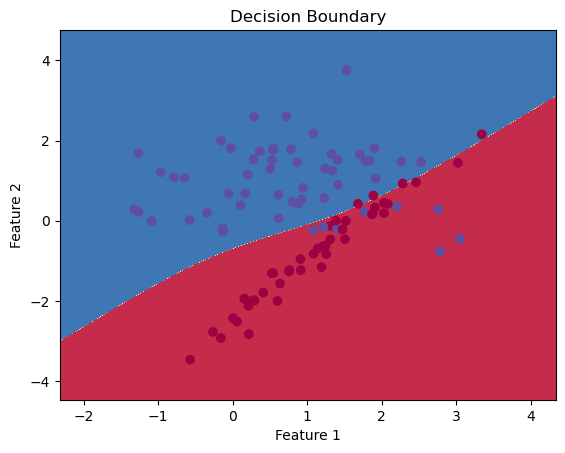

In [9]:
# Visualize Decision Boundary:

plot_decision_boundary(model, X_test, y_test)